Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).


Below, please fill in your name and collaborators, if any:

In [1]:
NAME = "Jeffrey Keomany"
COLLABORATORS = ""

# Assignment 4 - Classification

In this assignment, you will practice using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.
The kNN is a simple and robust classifier, which is used in different applications.

We will use the Iris dataset for this assignment.
The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The goal is to train kNN algorithm to distinguish the species from one another.

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris. Alternatively, you can import the data using sklearn.datasets. You will need to dowload both the sepal/petal data and the target variable information, then merge the two datasets.

3. _(1 points)_ Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

4. _(2 points)_ **Data inspection.** 
    - Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.
    - Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting). 

5. _(2 points)_ **Prepare the data for classification**. 
    - Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

6. _(1 point)_ **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

7. _(2 points)_ **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`. 
    - First, instantiate the model,
    - Then, run the classifier on the training set.

8. _(3 points)_ Use learning model to **predict the class from features**, run prediction on `X` from test part. 
    - Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test.
    - Comparing these two arrays (predicted classes and test `Y`), count the numbers of correct predictions and predictions that were wrong. (**HINTS:** `NumPy` arrays can be compared using `==` operator. You can also use `NumPy`'s operator `count_nonzero` to count number of non-False values).

9. _(4 points)_ In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors `k`. We will use the following **number of neighbors `k`: 1, 3, 5, 7, 10, 20, 30, 40, and 50**:
    - Generate 10 random train/test splits for each value of `k`
    - Fit the model for each split and generate predictions
    - Average the accuracy score for each `k`
    - Calculate the average number of correct predictions for each `k` as well
    - Plot the accuracy score for different values of `k`. What conclusion can you make based on the graph?


In [2]:
# Here are all imports that you will need

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Question 3
# Data download from sklearn
from sklearn.datasets import load_iris
data=load_iris().data
target=load_iris().target
df_data=pd.DataFrame(data,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])
df_target=pd.DataFrame(target,columns=['Iris Class'])

# Remember to merge the DataFrames into one after they are created.

join = [df_target, df_data]
flowers = pd.concat(join, axis = 1)
flowers

,Iris Class,Sepal Length,Sepal Width,Petal Length,Petal Width
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,2,6.7,3.0,5.2,2.3
146,2,6.3,2.5,5.0,1.9
147,2,6.5,3.0,5.2,2.0
148,2,6.2,3.4,5.4,2.3


In [4]:
# Question 4 - Data inspection

# Changes the Iris Class to their names to make it easier to understand
flowers['Iris Class'] = flowers['Iris Class'].replace([0, 1, 2], ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'])

print(flowers.head(5)) # Shows the first 5 rows of the dataset

print(flowers.isnull().values.any()) # No null vlaues in dataset

print(flowers.shape) # Size of dataset


    Iris Class  Sepal Length  Sepal Width  Petal Length  Petal Width
0  Iris Setosa           5.1          3.5           1.4          0.2
1  Iris Setosa           4.9          3.0           1.4          0.2
2  Iris Setosa           4.7          3.2           1.3          0.2
3  Iris Setosa           4.6          3.1           1.5          0.2
4  Iris Setosa           5.0          3.6           1.4          0.2
False
(150, 5)


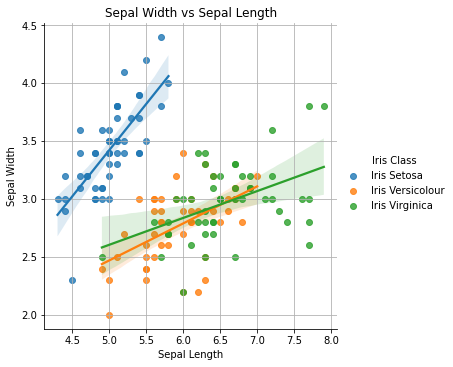

In [5]:
# Plot of Sepal Width vs Sepal Length
sepal = sns.lmplot(data = flowers, x = 'Sepal Length', y = 'Sepal Width', hue = 'Iris Class')
sepal.set(title='Sepal Width vs Sepal Length')

plt.grid()
plt.show()

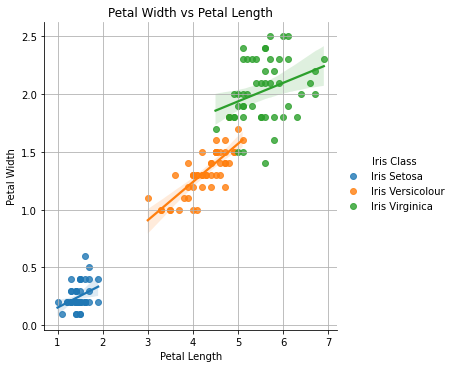

In [6]:
# Plot of Petal Width vs Petal Length
petal = sns.lmplot(data = flowers, x = 'Petal Length', y = 'Petal Width', hue = 'Iris Class')
petal.set(title='Petal Width vs Petal Length')

plt.grid()
plt.show()

In [7]:
# Question 5 - Prepare the data for classification. 


X = data # Use array without my Iris Class
Y = target # Use target array created earlier

In [8]:
sw = flowers['Sepal Width']
sl = flowers['Sepal Length']
pw = flowers['Petal Width']
pl = flowers['Petal Length']


In [9]:
# Question 6 - Split the Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Data split into train and test
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [10]:
# Question 7 - Run the Fit

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [11]:
# Question 8 - Predict the class from features

Y_predict = knn.predict(X_test)
print(Y_predict) # makes an estimate of X_test's Iris class

[1 0 2 1 0 1 0 2 2 1 1 0 1 1 1 2 2 0 0 2 0 2 1 0 0 0 2 2 1 0]


In [12]:
print(knn.score(X_test, Y_test)) # Is the accuracy score of the prediction

0.9666666666666667


In [13]:
print(Y_test) # Is the actual Iris class of the X_test's

[1 0 2 2 0 1 0 2 2 1 1 0 1 1 1 2 2 0 0 2 0 2 1 0 0 0 2 2 1 0]


In [14]:
errors = Y_predict == Y_test

right_predict = np.count_nonzero(errors)
wrong_predict = len(Y_predict) - right_predict

# Prints the correct spelling of predictions
if right_predict != 1:
    print(right_predict, 'right predictions')
else: 
    print(right_predict, 'right prediction')
    
if wrong_predict != 1:
    print(wrong_predict, 'wrong predictions')
else: 
    print(wrong_predict, 'wrong prediction')    

29 right predictions
1 wrong prediction


In [15]:
# Question 9 - test with k: 1, 3, 5, 7, 10, 20, 30, 40, and 50
import sys
np.set_printoptions(threshold=sys.maxsize)

'''Generate 10 random train/test splits for each value of k
Fit the model for each split and generate predictions
Average the accuracy score for each k
Calculate the average number of correct predictions for each k as well
Plot the accuracy score for different values of k. What conclusion can you make based on the graph?'''

k = [1, 3, 5, 7, 10, 20, 30, 40, 50]

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 10)
skf.get_n_splits(X, Y) # Number of splitting iterations


# Creates the 10 random train/test splits for each value of k
score = []
Y_predict = []
Y_actual = []

# q is the index along k
for q in k:
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]

        knn = KNeighborsClassifier(n_neighbors=q)
        knn.fit(X_train, Y_train) # Runs the Fit
        Y_predict.append(knn.predict(X_test))
        Y_actual.append(Y_test)
        score.append(knn.score(X_test, Y_test))

score_array = np.array(score)
Y_predict_array = np.array(Y_predict)
Y_actual_array = np.array(Y_actual)
print(score_array.shape)
print(Y_predict_array.shape)
print(Y_actual_array.shape)
print(X_train.shape)
print(X_test.shape)

(90,)
(90, 15)
(90, 15)
(135, 4)
(15, 4)


In [16]:
# Calculates the average accuracy score for each k value
# takes the average score every 10 numbers
avg_score = np.average(score_array.reshape(-1, 10), axis = 1)
avg_score = np.round(avg_score, 3)

# Creates a dictionary to see the each k value accuracy scores
print(dict(zip(k, avg_score)))

{1: 0.96, 3: 0.967, 5: 0.967, 7: 0.967, 10: 0.967, 20: 0.98, 30: 0.953, 40: 0.953, 50: 0.927}


In [17]:
# Counts the number of correct predictions for each k value
# Sums the correct predictions for every split sample
array_check = Y_predict == Y_test
prediction = np.sum(array_check, axis = 1)

# Takes the average score every 10 numbers
count = np.average(prediction.reshape(-1, 10), axis = 1)
count = np.round(count, 3)
print(dict(zip(k, count)))

{1: 14.4, 3: 14.5, 5: 14.5, 7: 14.5, 10: 14.5, 20: 14.7, 30: 14.3, 40: 14.3, 50: 13.9}


<function matplotlib.pyplot.show(close=None, block=None)>

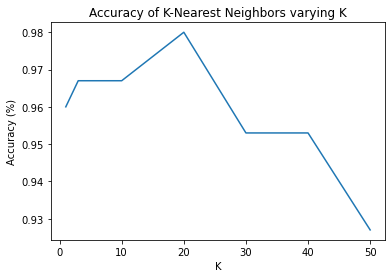

In [18]:
# Plot accuracy based on k
plt.plot(k,avg_score)
plt.title("Accuracy of K-Nearest Neighbors varying K")
plt.ylabel("Accuracy (%)")
plt.xlabel("K")
plt.show

# From the graph I can see that for this dataset, KNN is most accurate around 20 nearest neighbors (k).
# 1 - 20 nearest neighbors is most accurate and after, more k values decrease the accuracy of KNN.